In [1]:
from lgca import get_lgca
import numpy as np
from matplotlib import pyplot as plt

In [120]:
# geometry
geom = 'hx'
restchannels = 1
l = 150
dims= l, l

In [121]:
# interaction parameters
r_m = 1e-3 # mutation rate for driver mutations
r_b = 0.1 # initial birth rate
r_d = 0.98 * r_b / 2 # initial death rate
capacity = 12 # deme capacity
gamma = 4. # rest channel weight
alpha = 2. # strength of steric interaction

In [122]:
nodes = np.zeros(dims+(6+restchannels,), dtype=int)
nodes[l//2, l//2, -1] = capacity

In [123]:
lgca = get_lgca(ib=True, bc='reflect', interaction='steric_evolution', dims=dims, nodes=nodes, ve=False, geometry='hx',
                r_m=r_m, r_b=r_b, capacity=capacity, gamma=gamma, r_d=r_d, alpha=alpha)

fitness increase for driver mutations set to  1.1


In [124]:
lgca.timeevo(1000, recordfampop=True, record=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [3:10:14<00:00, 11.41s/it]


(<Figure size 800x606.218 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x25d5a92d820>)

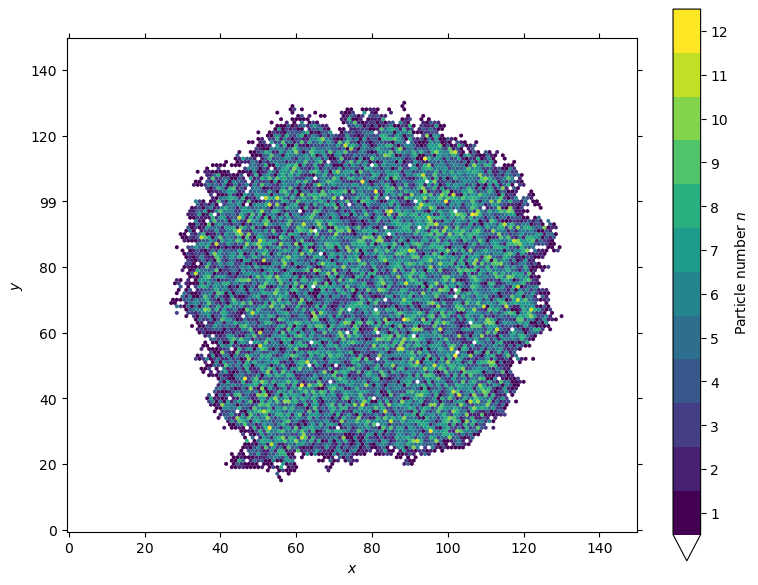

In [125]:
lgca.plot_density(lgca.dens_t[-1])

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Time $k$', ylabel='Relative frequency'>,
 None)

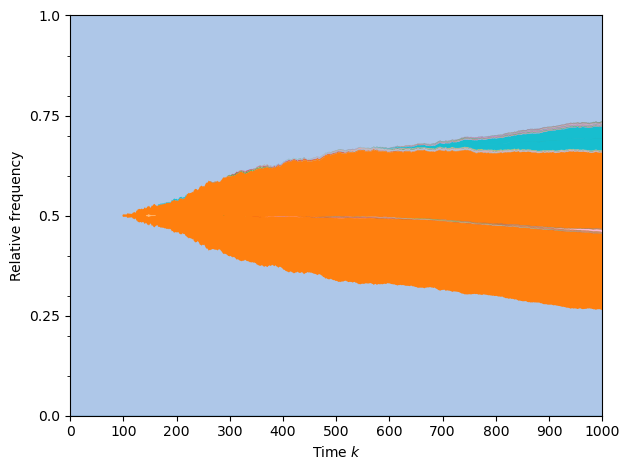

In [126]:
lgca.muller_plot()

In [127]:
cells_t = lgca.nodes_t.sum(-1)

In [128]:
families_loc_t = np.zeros(cells_t.shape, dtype=int)
# families_loc_t[...] =np.nan

In [129]:
for ind, cells in np.ndenumerate(cells_t):
    if len(cells) == 0:
        continue
    else:
        values, counts = np.unique([lgca.props['family'][cell] for cell in cells], return_counts=True)
        ind2 = np.argmax(counts)
        families_loc_t[ind] = values[ind2]

(<Figure size 800x800 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x25d3581ebe0>)

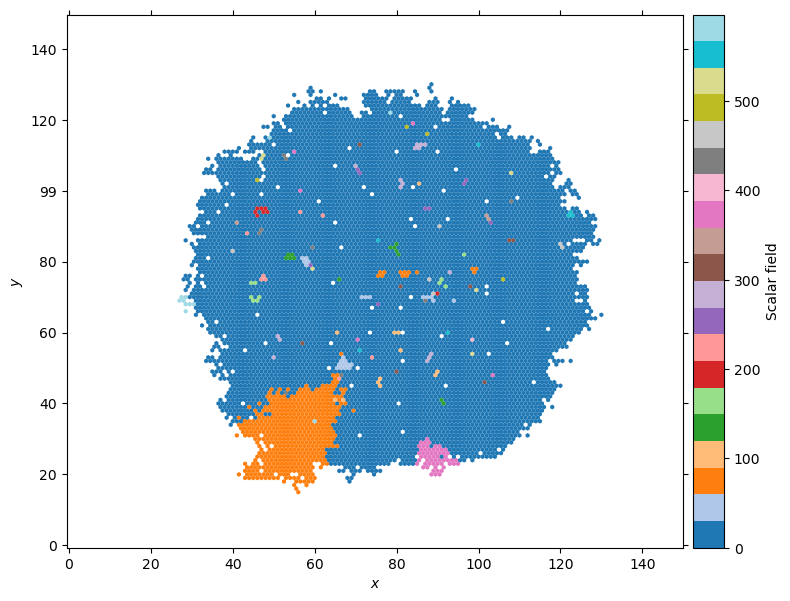

In [130]:
t = -1
# print(np.unique(families_loc_t[t]))
lgca.plot_scalarfield(families_loc_t[t], cmap='tab20', mask=1-np.heaviside(lgca.dens_t[t], 0))

In [134]:
import pickle 
with open('lgca_boundary_growthexample.lgca', 'wb') as file:
    pickle.dump(lgca, file)

In [135]:
with open('lgca_boundary_growthexample.lgca', 'rb') as file:
      
    # Call load method to deserialze
    lgca2 = pickle.load(file)

(<Figure size 800x606.218 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x25d2c660160>)

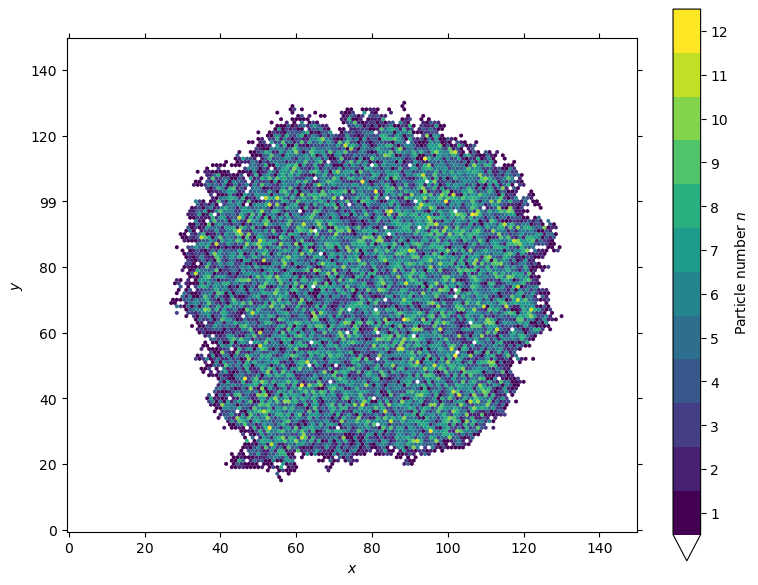

In [136]:
lgca2.plot_density()